<div align=center>

<font size=5>
    In the Name of God
<font/>
<br/>
<br/>
<font>
    Sharif University of Technology - Departmenet of Electrical Engineering
</font>
<br/>
<font>
    Introducing with Machine Learing - Dr. S. Amini
</font>
<br/>
<br/>
Spring 2023

</div>

<hr/>
<div align=center>
<font size=6>
    Neural Networks Practical Assignment
    
    Question 1
</font>
<br/>		
<font size=4>
<br/>
</div>

# Personal Data

In [1]:
# Set your student number
student_number = 99101608
Name = 'Melika'
Last_Name = 'Rajabi'

# Rules
- You are not allowed to add or remove cells. You **must use the provided space to write your code**. If you don't follow this rule, **your Practical Assignment won't be graded**.  

- Collaboration and using the internet is allowed, but your code **must be written by yourself**. **Copying code** from each other or from available resources will result in a **zero score for the assignment**.

- You are not allowed to use `torch.nn`, `torch.optim` and any activation function and loss function implemented in torch. 

In [2]:
!pip install numpy
!pip install matplotlib
!pip install torchvision
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


The exclamation mark (!) is used to run shell commands within the notebook environment. When using the exclamation mark before a command, it indicates that the command should be executed in the underlying system shell rather than being interpreted as a Python command.

## Importing Libraries

In [3]:
import torch
from torchvision.datasets import FashionMNIST
from torchvision import transforms
from torch.utils.data import DataLoader

import numpy as np
from matplotlib import pyplot as plt
from typing import Dict

## Datasets and Dataloaders

Here, we download and load the train and test `FashionMNIST` dataset with the desired transforms. Then, we define the dataloaders for `train` and `test`.

In [4]:
train_set = FashionMNIST(root='.', train=True, download=True, transform=transforms.ToTensor())
test_set = FashionMNIST(root='.', train=False, download=True, transform=transforms.ToTensor())

root='.': Specifies the root directory where the dataset will be stored. In this case, it will be stored in the current directory.

train=True or False: Indicates that we want to load the training data or the test data.

download=True: Specifies that if the dataset is not already downloaded, it should be downloaded from the internet.

transform=transforms.ToTensor(): Applies the ToTensor() transformation to the dataset, converting the images to PyTorch tensors, which is the expected format for many machine learning models.


In [5]:
image_shape = train_set[0][0].shape
input_dim = np.prod(image_shape).item()
num_classes = len(FashionMNIST.classes)

Train set contains $60000$, $28 \times 28$ images plus a label for each image. Therefore, train_set is actually $60000 \times 2$. Each train_set[i][0] (image_shape) is $28 \times 28$ and train_set[i][1] is an integer indicating the label.

np.prod multiplies all the elements in an array and item() converts it into scalar. Therefore input_dim = $28 \times 28 = 784$.

FashionMNIST.classes represents a list of class labels in the FashionMNIST dataset. Therefore, num_classes equals the number of classes in the providing dataset. i.e. $10$.

In [6]:
train_loader = DataLoader(train_set, 64, shuffle=True)
test_loader = DataLoader(test_set, 64, shuffle=False)

Data loaders are a convenient way to load and iterate over the data in batches during the training or testing phase of a machine learning model. 

First we determine which dataset is going to be loaded. Then we provide the number that specifies the batch size (n), indicating that the data will be divided into batches of n samples. shuffle=True means that the data will be randomly shuffled before each epoch. Shuffling the data helps in reducing any bias that may arise from the ordering of the data during training.

## Visualization

Visualize 1 random image from each class

- **Hint**:  You can use `plt.subplots` for visualization

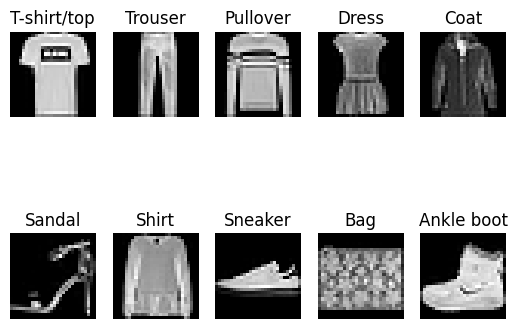

In [7]:
## FILL HERE

sample_images = {}
for image, label in train_set:
  if label not in sample_images:
    sample_images[label] = image.squeeze()
  if len(sample_images) == num_classes:
    break

figure = plt.figure()
rows, cols = 2, 5
for label, image in sample_images.items():
  figure.add_subplot(rows, cols, label+1)
  plt.imshow(image, cmap='gray')
  plt.title(FashionMNIST.classes[label])
  plt.axis("off")
plt.show()


We do the visualization in $2$ steps. First we choose the samples and then plot them. 

To choose the samples, we iterate over the first elements of the train set and gather elements with new labels. If the number of gathered elements reach the number of classes, we stop the iteration cause that means none of the nonobserved elements has new label. Squeeze() removes single-dimensional entries from the shape of an array.

Now by using "imshow" command, we plot the images. We also set the color to gray. 

## Initializing model's parameters

In this part, we create the model and initialize its parameters and store the values of these parameters in the variable `parameters` which is a dictionary including the weigths and biases of each layer.

In [8]:

def add_linear_layer(parameters: dict, shape, device, i=None):
  """
  This function adds parameters of a linear unit of shape `shape` to the `parameters` dictionary.
  """

  n_in, n_out = shape

  with torch.no_grad():

    w = torch.zeros(*shape, device=device)
    # Kaiming initialization for ReLU activations:
    bound = 1 / np.sqrt(n_in).item()
    w.uniform_(-bound, bound)
    b = torch.zeros(n_out, device=device)  # No need to (1, n_out). It will broadcast itself.
    
  w.requires_grad = True
  b.requires_grad = True

  # `i` is used to give numbers to parameter names
  parameters.update({f'w{i}': w, f'b{i}': b})
    

This function initializes the weights and biases for a linear unit, and adds them to a dictionary of parameters. It follows the Kaiming initialization strategy for the weights and initializes the biases as zeros.

parameters is a dictionary to store the parameters, shape is a tuple representing the shape of the linear unit, device is the device on which the tensors will be created, and an optional parameter i is used to give numbers to parameter names.

n_in, n_out = shape $→$ Unpacks the shape tuple into two variables. n_in represents the input size, and n_out represents the output size of the linear unit.

with torch.no_grad() $→$ Starts a context block where operations inside it will not track gradients. This is used for efficiency when initializing the parameters.

w = torch.zeros(*shape, device=device) $→$ Creates a tensor filled with zeros, with the shape specified by the shape tuple, and places it on the specified device.

bound = 1 / np.sqrt(n_in).item() $→$ Calculates the bound for the uniform distribution used for initializing the weights.

w.uniform_(-bound, bound) $→$ Initializes the weights (w) with values drawn from a uniform distribution between -bound and bound. This is a common initialization strategy called Kaiming initialization, often used for ReLU activations.

b = torch.zeros(n_out, device=device) $→$ Creates a tensor filled with zeros of shape (n_out,), representing the biases for the linear unit.

w.requires_grad = True and b.requires_grad = True $→$ mark the tensors w and b as requiring gradients, which means that their gradients will be computed during backpropagation.

parameters.update({f'w{i}': w, f'b{i}': b}) $→$ Updates the parameters dictionary by adding the weight tensor w with the key f'w{i}' (where i is an optional index) and the bias tensor b with the key f'b{i}'.

Now we define our neural network with the given layers and add the weights and biases to the dictionary `parameters`. **You are allowed to modify the values of the layers**.

In [9]:

layers = [
    (input_dim, 512),
    (512, 256),
    (256, 128),
    (128, 64),
    (64, num_classes)
]
num_layers = len(layers)
parameters = {}

# Setting the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Adding the parameters to the dictionary
for i, shape in enumerate(layers):
  add_linear_layer(parameters, shape, device, i)

parameters.keys()


dict_keys(['w0', 'b0', 'w1', 'b1', 'w2', 'b2', 'w3', 'b3', 'w4', 'b4'])

This code sets up a neural network with multiple linear layers based on the provided layer shapes.

First it defines a list called layers that contains tuples representing the shape of each layer in the neural network. Each tuple represents the input size and output size of a linear layer.

device = torch.device("cuda" if torch.cuda.is_available() else "cpu") $→$ Sets the device variable to "cuda" if a CUDA-enabled GPU is available, otherwise it sets it to "cpu". This is used to determine the device (GPU or CPU) on which the tensors and computations will be performed. 

In the next step, it starts a loop that iterates over the layers list and assigns each tuple to the variables i and shape. The enumerate() function provides both the index (i) and the value (shape) of each element in the layers list. And then by using the defined function, it adds the parameters of the linear layer to the parameters dictionary.

In the end, it displays the keys of the parameters dictionary, which represent the parameter names.

## Defining the required functions

In this section, we should define the required functions. For each of these functions, the inputs and the desired outputs are given and you should write all or part of the function. **You are not allowed to use the activation functions and the loss functions implemented in torch**.

Computing affine and relu outputs:

In [10]:

def affine_forward(x, w, b):
  ## FILL HERE

  out = torch.mm(x, w) 
  out = torch.add(out, b)  
  return out


def relu(x):
  ## FILL HERE
  
  zeros = torch.zeros_like(x)
  out = torch.max(x, zeros)
  return out


For implementing the affine_forward function, we used torch "mm" and "add" commands to multiply x and w and then add the result to b. we set the broadcast True to provide size compatibilities.

To implement the ReLU function, we first create a zero tensor with the shape like the input x and then by using the element wise maximum between two tensors (input and zeros), we result in the output.

Function `model` returns output of the whole model for the input `x` using the parameters:

In [11]:

def model(x: torch.Tensor, parameters, num_layers=num_layers):
  # Number of batches
  B = x.shape[0]
  x = x.view(B, -1)

  # FILL HERE
  
  output = x
  for i in range(num_layers):

    w = parameters[f'w{i}']
    b = parameters[f'b{i}']

    output = affine_forward(output, w, b)

    if i != num_layers-1:
      output = relu(output)

  return output


To implement the model function that returns the output of the model for the given input, we should apply affine_forward and relu functions for each layer based on that layer's parameters. Therefore, we iterate over the layers, find the parameters corresponding to that layer from the parameters tensor, apply affine_forward and relu respectively. Note that for the last layer, we do not apply relu.

Note that before starting the algorithm we convert the input images into vectors. 

Implementing cross entropy loss:

In [12]:

def cross_entropy_loss(scores, y):
  n = len(y)

  # FILL HERE

  scores_exp = torch.exp(scores)
  probs = scores_exp / torch.sum(scores_exp, axis=1, keepdims=True)

  loss = -torch.log(probs[torch.arange(n), y])
    
  return loss


In our context, The cross entropy loss function for each sample equals $-\log (\text{predicted probability for the correct class for the sample})$. 

Here we have the scores which is a $n \times C$ matrix. Each row represents the  predicted scores for the provided sample to belong to each class from 0 to C-1. To convert the scores into probability, we apply softmax on each row separately: 

```
scores_exp = torch.exp(scores)
```
This line calculates the $e^{score}$ for each sample and each class.

```
torch.sum(scores_exp, axis=1, keepdims=True)
```
This line calculates the sum of each row and returns a $n \times 1$ matrix.

Now if we devide them to each other, we result in the score matrix converted into probability matrix. 

For accessing the predicted probability of the correct class in each sample, we use "[torch.arange(n), y]" indexing. This means that for each row, choose the correct class index. 

In the end we compute the $-log$ to result in a $n \times 1$ matrix containing the cross entropy loss for each sample.


Implementing a function for optimizing paramters and a function to zeroing out their gradients:

In [13]:

def sgd_optimizer(parameters: Dict[str, torch.Tensor], learning_rate=0.001):
  '''This function gets the parameters and a learning rate. Then updates the parameters using their
  gradient (parameter.grad). Finally, you should zero the gradients of the parameters after updating
  the parameter value.'''
  ## FILL HERE

  for param in parameters.values():

    param.data -= learning_rate * param.grad

    param.grad.zero_()


For each parameter in the parameters tensor, we pick the value and then using learning rate and its gradient, we update it. Then by using the "grad.zero_()" command, we make its gradient zero.

Training functions:

In [14]:

def accuracy(y_pred: np.ndarray, y_true: np.ndarray):
  ## FILL HERE

  correct = np.equal(y_pred, y_true)
  acc = np.sum(correct) / len(y_true)

  return acc


def train(train_loader, learning_rate=0.001, epoch=None):
  '''This function implements the training loop for a single epoch. For each batch you should do the following:
      1- Calculate the output of the model to the given input batch
      2- Calculate the loss based on the model output
      3- Update the gradients using loss.backward() method
      4- Optimize the model parameters using the sgd_optimizer function defined previously
      5- Print the train loss (Show the epoch and batch as well)
      '''

  train_loss = 0
  N_train = len(train_loader.dataset)
   
  # Creating empty lists Y and Y_pred to store the labels and predictions of each batch
  # for calculateing the accuracy later
  Y = []
  Y_pred = []
    
    
  for i, (x, y) in enumerate(train_loader):

    x = x.to(device)
    y = y.to(device)
    p = model(x, parameters)

    ## FILL HERE

    loss = cross_entropy_loss(p, y)
    train_loss += loss.mean().item()

    loss.mean().backward()

    sgd_optimizer(parameters, learning_rate=0.001)
        
    y_pred = p.argmax(dim=-1)

    Y.append(y.cpu().numpy())
    Y_pred.append(y_pred.cpu().numpy())

    print(f"Epoch [{epoch}], Batch [{i+1}], Train Loss: {loss.mean().item()}")

  Y = np.concatenate(Y)
  Y_pred = np.concatenate(Y_pred)

  train_loss /= N_train

  acc = accuracy(Y_pred, Y)

  print(f'Accuracy of train set: {acc}')

  return train_loss, acc


def validate(loader, epoch=None, set_name=None):
  '''This function validates the model on the test dataloader. The function goes through each batch and does
  the following on each batch:
    1- Calculate the model output
    2- Calculate the loss using the model output
    3- Print the loss for each batch and epoch
    
  Finally the function calculates the model accuracy.'''

  total_loss = 0
  N = len(loader.dataset)
    
  # Creating empty lists Y and Y_pred to store the labels and predictions of each batch
  # for calculateing the accuracy later
  Y = []
  Y_pred = []


  for i, (x, y) in enumerate(loader):

    x = x.to(device)
    y = y.to(device)
    p = model(x, parameters)

    ## FILL HERE

    loss = cross_entropy_loss(p, y)
    total_loss += loss.mean().item()
        
    y_pred = p.argmax(dim=-1)

    Y.append(y.cpu().numpy())
    Y_pred.append(y_pred.cpu().numpy())
        
    print(f"Epoch [{epoch+1}], Batch [{i+1}], Loss: {loss.mean().item()}")

  Y = np.concatenate(Y)
  Y_pred = np.concatenate(Y_pred)

  total_loss /= N

  acc = accuracy(Y_pred, Y)

  print(f'Accuracy of {set_name} set: {acc}')

  return total_loss, acc


For the accuracy function, first we compute the number of correct predicted labels using "np.equal". Then by deviding this number to the total samples, we result in the output.

In the train function, we iterate over the batches, performing following tasks:

1. Caculating the output of the model for each x. x is a tensor including $64$ elements (number of samples in each batch), each containing a $28 \times 28$ image. 

2. Storing the y tensor which indicates the labels of these $64$ images

3. Calculating the loss using cross entropy function and then calculating the mean of the loss vector and add it to the train loss 

4. Updating the gradients using loss.backward() method

5. Optimizing the model parameters using the sgd_optimizer function defined previously.

6. Finding the predicted labels by using "argmax" on the scores.

7. Printing the epoch and the batch we are in. And also the loss of each batch we've calculated to add to the train loss.

Then we add the predicted and the true labels to the main Y and Y_pred using "concatenate" command. In the next step , we compute the accuracy using our defined function. And in the end, we return the total train loss that is the train_loss devided by N_train and the accuracy.

In the validate function, we act very similar to the train function but using the test loader and also we won't perform the steps number $4$ and $5$.


In [15]:
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

In [16]:
def train_model(dataloaders, num_epochs, learning_rate=0.001, model_name='pytorch_model'):
  '''This function trains the model for the number of epochs given and stores, calculates and prints the train
  and test losses and accuracies. Finally, it plots the accuracy and loss history for training and test sets'''
  
  train_loader, test_loader = dataloaders

  for epoch in range(num_epochs):

    ## FILL HERE
    ## You should calculate the train and test loss and accuracies for each epoch and add them to
    ## the lists `train_losses`, `test_losses`, `train_accuracies` and `test_accuracies`

    train_loss, train_acc = train(train_loader, learning_rate, epoch)
    test_loss, test_acc = validate(test_loader, epoch, set_name=None)

    train_losses.append(train_loss)
    test_losses.append(test_loss)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

  ## Plot the loss history of training and test sets 
  ## FILL HERE

  plt.plot(train_losses, label='Train')
  plt.plot(test_losses, label='Test')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.title(f'{model_name} - Loss History')
  plt.legend()
  plt.show()

  ## Plot the accuracy history of training and test sets
  ## FILL HERE

  plt.plot(train_accuracies, label='Train')
  plt.plot(test_accuracies, label='Test')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.title(f'{model_name} - Accuracy History')
  plt.legend()
  plt.show()


For implementing this function, first of all using the train and validate functions that we've implemented, we compute the train and test loss and accuracy. Then we add these numbers to the main lists created for each. In the end we plot these four lists that indicate the loss and accuracy hostory of train and test sets. 

Streaming output truncated to the last 5000 lines.
Epoch [20], Batch [486], Train Loss: 0.7818667888641357
Epoch [20], Batch [487], Train Loss: 0.8088809847831726
Epoch [20], Batch [488], Train Loss: 0.7608166933059692
Epoch [20], Batch [489], Train Loss: 0.8933385014533997
Epoch [20], Batch [490], Train Loss: 1.0034886598587036
Epoch [20], Batch [491], Train Loss: 0.7688308954238892
Epoch [20], Batch [492], Train Loss: 0.7898273468017578
Epoch [20], Batch [493], Train Loss: 0.8562772870063782
Epoch [20], Batch [494], Train Loss: 0.8634331822395325
Epoch [20], Batch [495], Train Loss: 0.6159061193466187
Epoch [20], Batch [496], Train Loss: 0.8876675367355347
Epoch [20], Batch [497], Train Loss: 0.9176874756813049
Epoch [20], Batch [498], Train Loss: 0.8345860242843628
Epoch [20], Batch [499], Train Loss: 0.9353675842285156
Epoch [20], Batch [500], Train Loss: 0.7026399970054626
Epoch [20], Batch [501], Train Loss: 0.7803460359573364
Epoch [20], Batch [502], Train Loss: 0.82767260074615

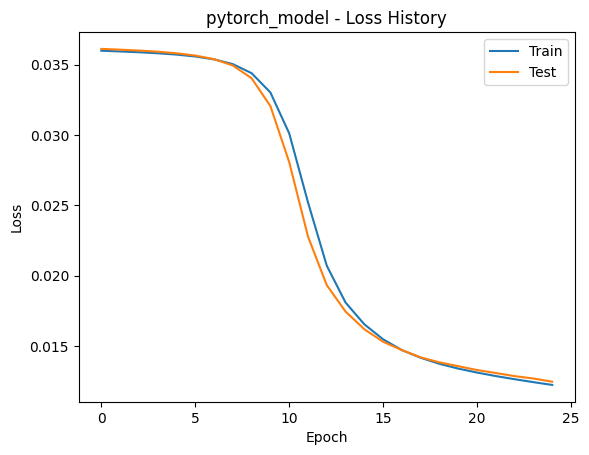

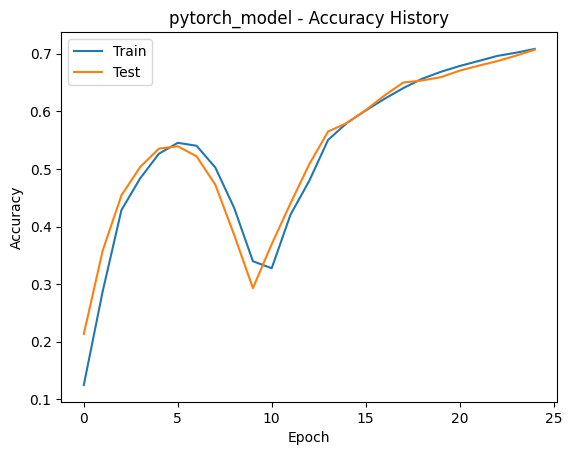

In [17]:
train_model([train_loader, test_loader], num_epochs=25, learning_rate=0.005)

In [18]:
print(f'Final test accuracy: {test_accuracies[-1]}')

Final test accuracy: 0.7069


## Visualization of the labels and predictions

In this section, you should visual one image from each class and show both the actual label and the predicted label for that image.

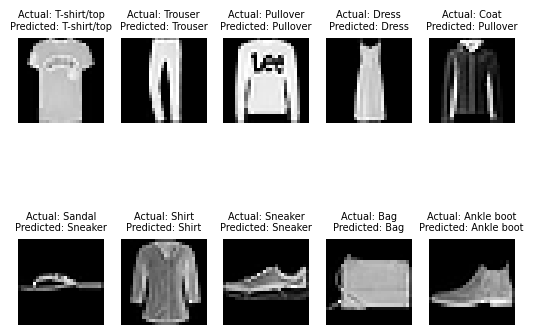

In [19]:
## FILL HERE

def visualize_predictions(loader):

  true_labels = []
  predicted_labels = []
  added_labels = []

  for images, labels in loader:

    images = images.to(device)
    true_labels = labels.to(device).cpu().numpy()

    outputs = model(images, parameters)
    predicted_labels = outputs.argmax(dim=-1).cpu().numpy()

    for image, true_label, pred_label in zip(images, true_labels, predicted_labels):

      if(true_label not in added_labels):

        added_labels.append(true_label)

        plt.subplot(2, 5, true_label+1)
        plt.imshow(image.squeeze(), cmap='gray')
        plt.axis('off')

        plt.title(f"Actual: {FashionMNIST.classes[true_label]}\nPredicted: {FashionMNIST.classes[pred_label]}", fontsize=7)

        if (len(added_labels) == num_classes):
          break

  plt.show()


visualize_predictions(test_loader)


First of all we implement a function performing the visualization and then call the function on the test loader. 

The function iterates over the loader, stores the true labels, calculates the output of the model for the input images and decides the predicted labels based on the argmax of the outputs in the same way as before.

In the next step, for each image and its corresponding true and predicted label (using "zip" command), we plot the image with the labels written above. 

This process continues until we gathered one image for each class. 